# 3D schematic

## Boundary conditions in 3D

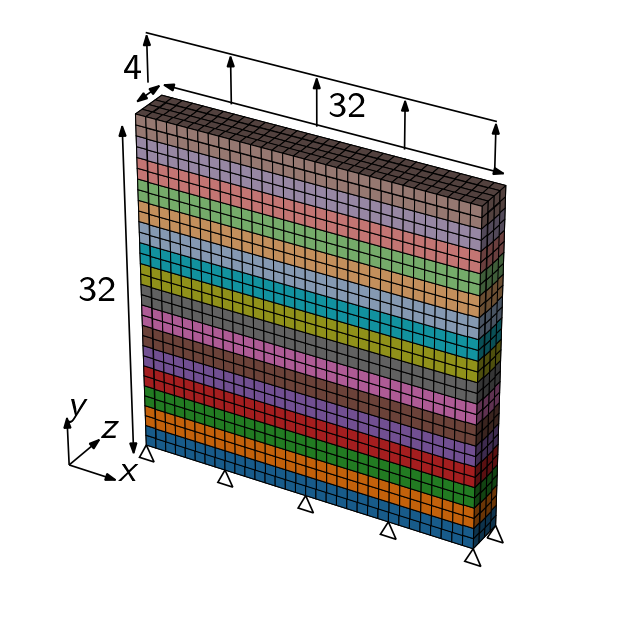

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cm_vis

# Load data (Assuming columns: x, y, z, c)
data = np.loadtxt("./sample_data/Macrostructure_1.vox", dtype=int)

# Extract voxel coordinates and color indices
x, y, z, c = data.T

# Get voxel grid size
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
z_min, z_max = z.min(), z.max()

# Create empty 3D arrays
voxelarray = np.zeros((x_max - x_min + 1, y_max - y_min + 1, z_max - z_min + 1), dtype=bool)
facecolors = np.empty(voxelarray.shape, dtype=object)

# Define 16 distinct colors
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#aec7e8",
    "#ffbb78",
    "#98df8a",
    "#ff9896",
    "#c5b0d5",
    "#c49c94",
]
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.linspace(c.min(), c.max(), 17), cmap.N)

# Fill voxel array and assign colors
for i in range(len(x)):
    xi, yi, zi = x[i] - x_min, y[i] - y_min, z[i] - z_min  # Shift to 0-based index
    voxelarray[xi, yi, zi] = True
    facecolors[xi, yi, zi] = cmap(norm(c[i]))  # Assign color

# Create a 3D figure
plt.style.use("sans")
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection="3d")

# Plot voxels
ax.voxels(voxelarray, facecolors=facecolors, edgecolors="k", lw=0.25)

# Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(azim=30, vertical_axis="y")
ax.set(xlim=(0, 35), ylim=(0, 35), zlim=(0, 5))

ax.set_box_aspect([1 / 7, 1, 1])
ax.set_axis_off()

# add dimensions
from cm_vis.scheme.basic3d import Scheme3D

scheme = Scheme3D(ax, lw=0.4)
scheme.add_coord_axis(origin=[-4, 0, 10], length=[5, 5, -5], shift=1)
scheme.dim_dist([0, 0, 6], [0, 32, 6], offset=[-5, -2, 0], text="32")
scheme.dim_dist([0, 33, 0], [32, 33, 0], offset=[0, 1, 0], text="32")
scheme.dim_dist([0, 33, 0], [0, 33, 4], offset=[-1, 2, 2], text="4")

# add BCs
fix_bnd = np.array([[0, 0, 4], [8, 0, 4], [16, 0, 4], [24, 0, 4], [32, 0, 4], [32, 0, 0]])
scheme.add_fix_bc(fix_bnd, dir=[0, -1.5, 0])
# scheme.add_roller_bc(fix_bnd, dir=[0, -0.5, 0], zdir='z')

load_bnd = np.array([[0, 34, 2], [8, 34, 2], [16, 34, 2], [24, 34, 2], [32, 34, 2]])
load = np.vstack((np.zeros(5), np.ones(5), np.zeros(5))).T
scheme.add_dist_bc(load_bnd, load, scale=4.5)